In [1]:
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
train = pd.read_csv('./data/train_preprocessed.csv')
test = pd.read_csv('./data/test_preprocessed.csv')
print(train.shape)
print(test.shape)

(188318, 132)
(125546, 132)


In [3]:
X_train = train.drop(['id', 'loss'], axis=1).values
y_train = train['loss'].values
print(X_train.shape)
print(y_train.shape)

(188318, 130)
(188318,)


In [4]:
def get_nn_2_layer():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1]))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    
    return model

In [5]:
nn_2_layer = get_nn_2_layer()

In [6]:
# Debug
for l in nn_2_layer.layers:
    print(l.name, l.input_shape, l.output_shape, l.activation)

dense_1 (None, 130) (None, 128) <function linear at 0x7f7acaceebf8>
activation_1 (None, 128) (None, 128) <function relu at 0x7f7acacee9d8>
dense_2 (None, 128) (None, 1) <function linear at 0x7f7acaceebf8>


In [36]:
result = \
nn_2_layer.fit(X_train, y_train, batch_size=128, nb_epoch=10, validation_split=0.2, verbose=1)

Train on 150654 samples, validate on 37664 samples
Epoch 1/10
150654/150654 [==============================] - 2s - loss: 1879.7629 - val_loss: 1670.7046

In [47]:
# Save model's training history
train_history = {}
train_history['nn_2_layer'] = result.history

## Plot a training curve

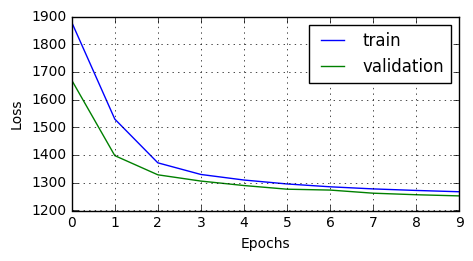

In [59]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 2.5)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(True)
ax.plot(train_history['nn_2_layer']['loss'], label='train')
ax.plot(train_history['nn_2_layer']['val_loss'], label='validation')
ax.legend()
plt.show()

In [8]:
result = nn_2_layer.fit(X_train, y_train, batch_size=128, nb_epoch=40, validation_split=0.2, verbose=1)

Train on 150654 samples, validate on 37664 samples
Epoch 1/40
150654/150654 [==============================] - 1s - loss: 1208.3125 - val_loss: 1199.7475

In [12]:
result.history['val_loss'][-1:]

[1190.0670843262133]

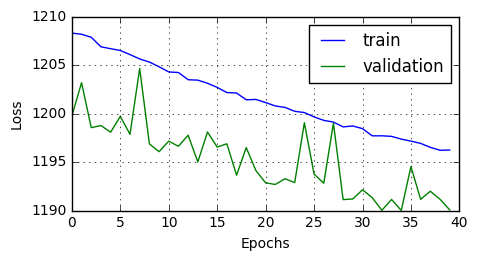

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 2.5)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.grid(True)
ax.plot(result.history['loss'], label='train')
ax.plot(result.history['val_loss'], label='validation')
ax.legend()
plt.show()

In [14]:
from collections import defaultdict

In [15]:
result = defaultdict(dict)

In [17]:
t0 = time.time()
result['nn_2_layer']['100_epochs'] = \
nn_2_layer.fit(X_train, y_train, batch_size=128, nb_epoch=100, validation_split=0.2, verbose=0)
print(time.time() - t0)

148.0812726020813


In [19]:
result['nn_2_layer']['100_epochs'].history['val_loss'][-1:]

[1178.3453703096791]

In [22]:
def plot_training_curve(train, val):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(5, 2.5)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.grid(True)
    ax.plot(train, label='train')
    ax.plot(val, label='validation')
    ax.legend()
    plt.show()

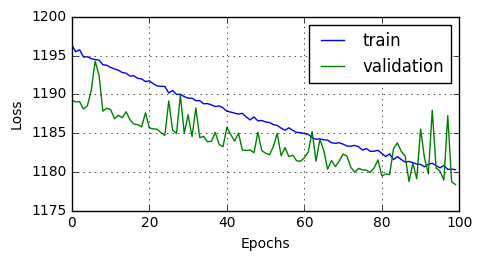

In [23]:
plot_training_curve(result['nn_2_layer']['100_epochs'].history['loss'],
                    result['nn_2_layer']['100_epochs'].history['val_loss'])

## 3 layers

In [4]:
def get_nn_3_layer():
    model = Sequential()

    model.add(Dense(128, input_dim=X_train.shape[1]))
    model.add(Activation('relu'))
    
    model.add(Dense(64))
    model.add(Activation('relu'))

    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')
    
    return model

In [ ]:
nn_3_layer = get_nn_3_layer()

t0 = time.time()
result['nn_3_layer']['50_epochs'] = \
nn_3_layer.fit(X_train, y_train, batch_size=128, nb_epoch=50, validation_split=0.2, verbose=1)
print(time.time() - t0)

Train on 150654 samples, validate on 37664 samples
Epoch 1/50
150654/150654 [==============================] - 1s - loss: 1561.0916 - val_loss: 1297.8130

In [ ]:
result['nn_3_layer']['50_epochs'].history['val_loss'][-1:]